In [63]:
import pandas as pd
df = pd.read_csv('/content/synthetic_physics_questions_final.csv', on_bad_lines='skip')
df.head()

,Original_Question,Category,Sub_category,Mode,Synthetic_Question,Synthetic_Answer,Validation_Status
0,A car starts from rest at a constant accelerat...,Kinematics and statics,Motion in One Dimension,easy,A train starts from rest and travels along a s...,"To solve this problem, we need to analyze the ...",Correct
1,A car starts from rest at a constant accelerat...,Kinematics and statics,Motion in One Dimension,easy,A bicycle starts from rest and moves with a co...,"To solve this problem, we need to analyze the ...",Correct
2,A car starts from rest at a constant accelerat...,Kinematics and statics,Motion in One Dimension,easy,A bicycle starts from rest and accelerates uni...,"To solve this problem, we'll analyze the motio...",Correct
3,A car starts from rest at a constant accelerat...,Kinematics and statics,Motion in One Dimension,medium,A motorcycle starts from rest and accelerates ...,"To solve this problem, we need to analyze the ...",Correct
4,A car starts from rest at a constant accelerat...,Kinematics and statics,Motion in One Dimension,medium,A train starts from rest and accelerates unifo...,"To solve this problem, we need to analyze the ...",Correct


In [64]:
df.shape

(52659, 7)

In [65]:
status_counts = df['Validation_Status'].value_counts()
print(status_counts)


Validation_Status
Correct      39285
Unclear      10037
Incorrect     3337
Name: count, dtype: int64


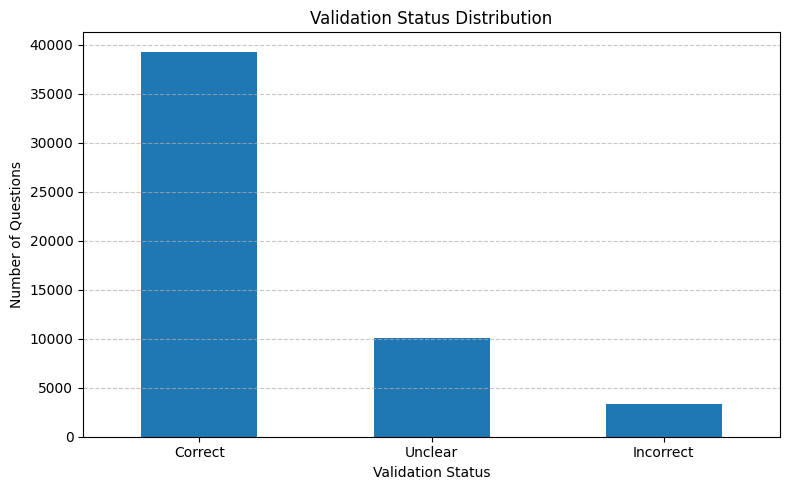

In [66]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8,5))
status_counts.plot(kind='bar')
plt.title('Validation Status Distribution')
plt.xlabel('Validation Status')
plt.ylabel('Number of Questions')
plt.xticks(rotation=0)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


In [67]:
df_clean = df[df['Validation_Status'] == 'Correct'].reset_index(drop=True)


In [68]:
category_counts = df_clean['Category'].value_counts()
subcategory_counts = df_clean['Sub_category'].value_counts()

print("Category counts:\n", category_counts, "\n")
print("Sub-category counts:\n", subcategory_counts)


Category counts:
 Category
Rotational Dynamics                     5804
Waves                                   5424
Rotational Kinematics                   4573
Oscillations                            4490
Gravitation                             3969
HeatandMatter                           3015
Electrostatics                          2470
Particle Dynamics                       1943
Electromagnetism II                     1632
FluidDynamics                           1421
Optics                                  1154
ElectricCircuits                        1129
Electromagnetism I                       895
Kinematics and statics                   736
Lagrangian and Hamiltonian Mechanics     630
Name: count, dtype: int64 

Sub-category counts:
 Sub_category
 Rotational Motion              3987
Motion in a Horizontal Plane    2786
Simple Harmonic Motion          2173
Rockets and Satellites          2090
Vibrating Strings               1908
                                ... 
Motion in Res

In [69]:
df_clean.shape

(39285, 7)

#Removing Duplicate questions

In [70]:
  # Find duplicates
duplicate_questions = df_clean[df_clean.duplicated('Synthetic_Question', keep=False)]

# Display duplicates
print(f"Number of duplicate synthetic questions: {duplicate_questions.shape[0]}")
duplicate_questions.head()


Number of duplicate synthetic questions: 38621


,Original_Question,Category,Sub_category,Mode,Synthetic_Question,Synthetic_Answer,Validation_Status
0,A car starts from rest at a constant accelerat...,Kinematics and statics,Motion in One Dimension,easy,A train starts from rest and travels along a s...,"To solve this problem, we need to analyze the ...",Correct
1,A car starts from rest at a constant accelerat...,Kinematics and statics,Motion in One Dimension,easy,A bicycle starts from rest and moves with a co...,"To solve this problem, we need to analyze the ...",Correct
2,A car starts from rest at a constant accelerat...,Kinematics and statics,Motion in One Dimension,easy,A bicycle starts from rest and accelerates uni...,"To solve this problem, we'll analyze the motio...",Correct
3,A car starts from rest at a constant accelerat...,Kinematics and statics,Motion in One Dimension,medium,A motorcycle starts from rest and accelerates ...,"To solve this problem, we need to analyze the ...",Correct
4,A car starts from rest at a constant accelerat...,Kinematics and statics,Motion in One Dimension,medium,A train starts from rest and accelerates unifo...,"To solve this problem, we need to analyze the ...",Correct


In [71]:
df_clean = df_clean.drop_duplicates(subset='Synthetic_Question', keep='first').reset_index(drop=True)

In [72]:
df_clean.shape

(6279, 7)

#Removing duplicates from solutions

In [73]:
  # Find duplicates
duplicate_solutions = df_clean[df_clean.duplicated('Synthetic_Answer', keep=False)]

# Display duplicates
print(f"Number of duplicate synthetic questions: {duplicate_solutions.shape[0]}")
duplicate_solutions.head()


Number of duplicate synthetic questions: 0


,Original_Question,Category,Sub_category,Mode,Synthetic_Question,Synthetic_Answer,Validation_Status


In [74]:
df_clean = df_clean.drop_duplicates(subset='Synthetic_Answer', keep='first').reset_index(drop=True)

In [75]:
df_clean.shape

(6279, 7)

#How many problems has solutions in them

In [76]:
# Filter rows containing 'solution' or 'solutions' (case-insensitive)
solution_rows = df_clean[df_clean['Synthetic_Question'].str.contains(r'\bsolution(s)?\b', case=False, na=False)]

# Display the result
print(f"Number of rows with 'solution' or 'solutions': {len(solution_rows)}")
solution_rows.head()


Number of rows with 'solution' or 'solutions': 1208


<ipython-input-76-09657770c958>:2: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  solution_rows = df_clean[df_clean['Synthetic_Question'].str.contains(r'\bsolution(s)?\b', case=False, na=False)]


,Original_Question,Category,Sub_category,Mode,Synthetic_Question,Synthetic_Answer,Validation_Status
9,"From an elevated point A, a stone is projected...",Kinematics and statics,Motion in One Dimension,medium,A particle is thrown vertically upwards from t...,"To solve this problem, we'll need to use kinem...",Correct
26,A particle moves according to the law x = A si...,Kinematics and statics,Motion in One Dimension,hard,A particle moves along a straight line accordi...,To find the total distance traveled by the par...,Correct
55,Cars A and B are travelling in adjacent lanes ...,Kinematics and statics,Motion in One Dimension,medium,A train starts from rest at a station and move...,To determine how far the train will have trave...,Correct
68,Water drips from the nozzle of a shower onto t...,Kinematics and statics,Motion in One Dimension,easy,A ball is dropped from a height of 4.9 meters ...,"To solve this problem, we need to determine ho...",Correct
75,Water drips from the nozzle of a shower onto t...,Kinematics and statics,Motion in One Dimension,hard,A ball is dropped from the top of a building w...,"To solve this problem, we need to consider the...",Correct


#Removing solutions from the questions

In [77]:
import re

def remove_solution_text_verbose(text):
    original_text = str(text)
    split_result = re.split(r'\bsolution(s)?\b', original_text, flags=re.IGNORECASE)

    if len(split_result) > 1:
        kept = split_result[0].strip()
        removed = original_text[len(kept):].strip()
        print("🟢 Kept:", kept)
        print("🔴 Removed:", removed)
        print("-" * 80)
        return kept
    else:
        return original_text.strip()

# Apply with verbose output
df_clean['Synthetic_Question'] = df_clean['Synthetic_Question'].apply(remove_solution_text_verbose)


Streaming output truncated to the last 5000 lines.
\frac{1}{3}A_0 = A_0 \cdot e^{-\frac{5\pi}{Q}}
\]

Dividing both sides by \( A_0 \) and taking the natural logarithm:

\[
\ln\left(\frac{1}{3}\right) = -\frac{5\pi}{Q}
\]

Solving for \( Q \):

\[
Q = -\frac{5\pi}{\ln\left(\frac{1}{3}\right)}
\
--------------------------------------------------------------------------------
🟢 Kept: Consider an RLC series circuit where an initial resonance frequency is observed at 1000 Hz. The circuit has a resistance of 10 ohms, an inductance of 0.1 henry, and a capacitance of 10 microfarads. After 10 cycles, the amplitude of the voltage across the capacitor drops to 25% of its initial value. Calculate the quality factor \( Q \) of the circuit and determine the bandwidth of the resonance curve.

**
🔴 Removed: Solution Steps:**

1. **Understand the damping:** The amplitude reduction to 25% indicates a damping effect due to the circuit resistance.
   
2. **Calculate the logarithmic decrement \(\delta\):*

#Cross-checking for solutions in the problem

In [78]:
# Filter rows containing 'solution' or 'solutions' (case-insensitive)
solution_rows = df_clean[df_clean['Synthetic_Question'].str.contains(r'\bsolution(s)?\b', case=False, na=False)]

# Display the result
print(f"Number of rows with 'solution' or 'solutions': {len(solution_rows)}")
solution_rows.head()


Number of rows with 'solution' or 'solutions': 0


<ipython-input-78-09657770c958>:2: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  solution_rows = df_clean[df_clean['Synthetic_Question'].str.contains(r'\bsolution(s)?\b', case=False, na=False)]


,Original_Question,Category,Sub_category,Mode,Synthetic_Question,Synthetic_Answer,Validation_Status


#Check how many unqiue orginal question are present

In [79]:
unique_count = df_clean['Original_Question'].nunique()
print(f"Number of unique original questions: {unique_count}")


Number of unique original questions: 939


In [80]:
question_counts_df = df_clean['Original_Question'].value_counts().reset_index()
question_counts_df.columns = ['Original_Question', 'Count']
question_counts_df.head()

,Original_Question,Count
0,A particle moves according to the law x = A si...,9
1,A tube 20 cm long containing sugar solution ro...,9
2,Sun rays incident obliquely on a pond are comp...,9
3,Light is incident from water (Î¼ = 1.33) on th...,9
4,"In a grating spectrum, which spectral line in ...",9


In [81]:
question_counts_df.shape

(939, 2)

#Testing records per unqiue question

In [82]:
sample_question = df_clean['Original_Question'].unique()[500]  # or manually paste the question
question_data = df_clean[df_clean['Original_Question'] == sample_question]

# Display the data
question_data.head()
question_data.shape

(9, 7)

In [83]:
df_clean.shape

(6279, 7)

In [84]:
df_clean.to_csv('cleaned_synthetic_data.csv', index=False)